In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
import json
import tensorflow as tf
import csv
import random
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers


embedding_dim = 100
max_length = 16
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size=160000
#Your dataset size here. Experiment using smaller values (i.e. 16000), but don't forget to train on at least 160000 to see the best effects
test_portion=.1

corpus = []


In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/training_cleaned.csv \
    -O /tmp/training_cleaned.csv

--2021-01-30 03:08:17--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/training_cleaned.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.31.128, 172.217.9.208, 172.217.164.144, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 238942690 (228M) [application/octet-stream]
Saving to: ‘/tmp/training_cleaned.csv’

/tmp/training_clean 100%[===================>] 227.87M   142MB/s    in 1.6s    

2021-01-30 03:08:19 (142 MB/s) - ‘/tmp/training_cleaned.csv’ saved [238942690/238942690]



In [4]:
count=0
with open("/tmp/training_cleaned.csv") as csvfile:
  ping=csv.reader(csvfile,delimiter=",")

  for row in ping:
    count+=1
    bulla=[]
    bulla.append(row[5])

    if row[0]==0:
      bulla.append(0)
    else:
      bulla.append(1)
      corpus.append(bulla)



In [5]:
num_sentences=count
print(num_sentences)
print(len(corpus))
print(corpus[1])


1600000
1600000
["is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!", 1]


In [6]:
sentences=[]
labels=[]


random.shuffle(corpus)
for x in range(training_size):
    sentences.append(corpus[x][0])
    labels.append(corpus[x][1])


tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
vocab_size=len(word_index)

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences,truncating=trunc_type,padding=padding_type,maxlen=max_length)

split = int(test_portion * training_size)

test_sequences = padded[:split]
training_sequences = padded[split:]
test_labels = labels[:split]
training_labels = labels[split:]

In [7]:
print(vocab_size)
print(word_index['i'])


138509
1


In [8]:
import numpy as np
training_labels=np.asarray(training_labels).astype("float32")
test_labels=np.asarray(test_labels).astype("float32")

In [11]:

import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Conv1D,Dense,Flatten,Embedding,LSTM,GRU,Bidirectional

model=Sequential()
model.add(Embedding(vocab_size+1,output_dim=100,input_length=16))
model.add(LSTM(128,return_sequences=True))
model.add(LSTM(128,return_sequences=True))
model.add(LSTM(128))
model.add(Dense(128,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["acc"])
model.summary()

num_epochs = 10
history = model.fit(training_sequences, training_labels, epochs=num_epochs, validation_data=(test_sequences, test_labels), verbose=1)

print("Training Complete")


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 16, 100)           13851000  
_________________________________________________________________
lstm_3 (LSTM)                (None, 16, 128)           117248    
_________________________________________________________________
lstm_4 (LSTM)                (None, 16, 128)           131584    
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 14,248,057
Trainable params: 14,248,057
Non-trainable params: 0
__________________________________________

<Figure size 432x288 with 0 Axes>

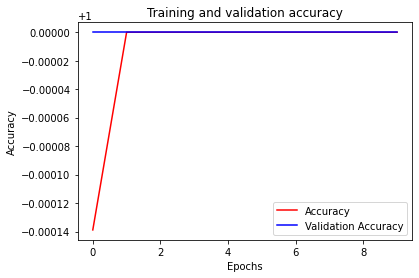

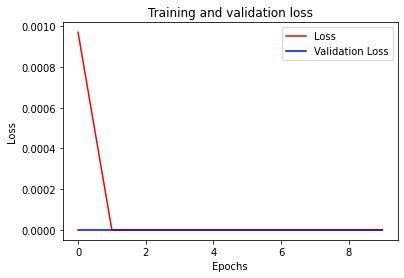

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) 
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()




In [13]:
weights=model.get_weights()[0]

In [ ]:
sentence="she was cute as a fairy, gentle as the falling snow, sparkling like the water in pool"

tok=tokenizer.texts_to_sequences([sentence])
padded=pad_sequences(tok,truncating=trunc_type,padding=padding_type,maxlen=max_length)

model.predict(padded)

In [1]:
import io

words=io.open("words.tsv",mode="w",encoding="utf-8")

vector=io.open("vectors.tsv",mode="w",encoding="utf-8")

In [ ]:
for i in range(1,vocab_size):
  word=tokenizer.index_word[i]
  words.write(word +"\n")

  embedding=weights[i]
  system="\t".join([str(k) for k in embedding])
  vector.write(system + "\n")
words.close()
vector.close()

In [ ]:
count=0
f=open("vectors.tsv")
for i in f:
  count+=1
print(count)

In [ ]:
count=0
f=open("words.tsv")
for i in f:
  count+=1

print(count)
  

In [ ]:
from google.colab import files
files.download("vectors.tsv")
files.download("words.tsv")